In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import get_file, plot_model

In [3]:
sns.set(style='white')
plt.style.use('seaborn-white')

In [4]:
data = pd.read_csv('data_new/players_20.csv',encoding='utf-8')

In [5]:
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+6,66+6,66+6,66+6,68+6,63+6,53+6,53+6,53+6,63+6
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,62+3,62+3,62+3,65+3,61+3,54+3,54+3,54+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+6,61+6,61+6,61+6,67+6,61+6,47+6,47+6,47+6,61+6
3,200389,https://sofifa.com/player/200389/jan-oblak/200002,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+6,63+6,63+6,63+6,66+6,61+6,49+6,49+6,49+6,61+6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18478,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,47+2,47+2,47+2,45+2
18479,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,肖明杰,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,45+2,44+2,44+2,44+2,45+2,47+2,47+2,47+2,47+2,47+2
18480,252332,https://sofifa.com/player/252332/wei-zhang/200002,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,50+2,50+2,50+2,47+2,48+2,49+2,49+2,49+2,48+2
18481,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,49+2,49+2,49+2,48+2,49+2,49+2,49+2,49+2,49+2


In [6]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [7]:
data.corr()

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
sofifa_id,1.000000,-0.735976,-0.092313,-0.202248,-0.027570,-0.445784,0.039701,-0.159430,-0.228633,-0.363053,-0.093892,-0.081642,-0.143316,0.179160,0.144882,0.108064,0.163930,-0.273978,-0.368841,-0.222710,-0.225574,-0.368830,-0.397041,-0.416155,-0.352874,-0.378978,-0.347869,-0.479731,-0.138747,-0.099702,-0.120753,-0.148815,-0.167534,-0.046728,-0.174629,-0.202421,-0.202093,-0.112714,0.119345,0.118304,-0.033027,-0.439053,0.040047,-0.283586,-0.187903,-0.077979,-0.278676,-0.179614,-0.232742,-0.165644,-0.103229,-0.231215,-0.148597,-0.386141,NaN,-0.088615,-0.069757,-0.111345,-0.115011,-0.113113,-0.121864,-0.111751
age,-0.735976,1.000000,0.081663,0.237192,-0.071537,0.465033,-0.261962,0.081360,0.152189,0.259625,0.074868,0.045662,0.065755,-0.225905,-0.123832,-0.121767,-0.201333,0.239706,0.331792,0.162799,0.260167,0.435579,0.430086,0.466940,0.405581,0.416828,0.339860,0.549337,0.128796,0.078961,0.149706,0.136585,0.143498,0.017213,0.142424,0.191202,0.184706,0.088826,-0.152943,-0.144290,-0.022686,0.463315,-0.089618,0.262120,0.185642,0.116808,0.341889,0.162490,0.259683,0.196211,0.086993,0.195763,0.141369,0.370415,NaN,0.116946,0.101640,0.110468,0.113095,0.112690,0.121648,0.111789
height_cm,-0.092313,0.081663,1.000000,0.769319,0.058348,0.040289,-0.002456,0.009823,0.018951,0.037273,-0.176666,-0.430103,0.011374,-0.032201,-0.014978,-0.094290,-0.430986,-0.202878,-0.288912,-0.412783,0.216344,0.491305,0.141382,0.150782,0.083718,0.132060,-0.020872,0.149612,-0.497259,-0.375975,0.010449,-0.370455,-0.350886,-0.499972,-0.447350,-0.408728,-0.334682,-0.425011,-0.558235,-0.474284,-0.634361,-0.019939,-0.790044,-0.173912,-0.041970,-0.291380,0.535481,-0.383866,-0.045295,-0.053552,-0.444928,-0.371337,-0.335177,-0.159193,NaN,-0.068869,-0.077015,0.367869,0.367816,0.365629,0.367577,0.367803
weight_kg,-0.202248,0.237192,0.769319,1.000000,0.004565,0.157001,-0.010938,0.051978,0.065523,0.090246,-0.129825,-0.352222,0.048469,-0.081405,-0.028604,-0.091964,-0.386302,-0.095214,-0.181498,-0.300543,0.218705,0.582461,0.256035,0.270712,0.215399,0.244359,0.079013,0.287441,-0.401008,-0.291715,0.039377,-0.290607,-0.261078,-0.416047,-0.349119,-0.309673,-0.259831,-0.340542,-0.493068,-0.420710,-0.546074,0.090949,-0.669853,-0.056260,0.030283,-0.219445,0.614283,-0.279167,0.030396,-0.028571,-0.355238,-0.280207,-0.246397,-0.053853,NaN,-0.053079,-0.064553,0.342886,0.343932,0.340471,0.344972,0.343656
league_rank,-0.027570,-0.071537,0.058348,0.004565,1.000000,-0.247514,-0.205555,-0.158465,-0.126788,-0.108886,-0.019927,-0.084000,-0.157173,-0.089219,-0.165949,0.050463,-0.022610,-0.120901,-0.194662,-0.169265,-0.085170,-0.045892,-0.187108,-0.195079,-0.192134,-0.190215,-0.005844,-0.215684,-0.085499,-0.063699,-0.057817,-0.128354,-0.082011,-0.086655,-0.086883,-0.076601,-0.128090,-0.100153,-0.011819,-0.009141,-0.017051,-0.212751,-0.012844,-0.134676,-0.005074,-0.014500,-0.023540,-0.085084,-0.060586,-0.061333,-0.080488,-0.132918,-0.063140,-0.151598,NaN,-0.050803,-0.050362,-0.016688,-0.017964,-0.018181,-0.020265,-0.018159
over

In [8]:
dataset = data[['overall','potential','value_eur','wage_eur','international_reputation','movement_reactions']]

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18483 entries, 0 to 18482
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   overall                   18483 non-null  int64
 1   potential                 18483 non-null  int64
 2   value_eur                 18483 non-null  int64
 3   wage_eur                  18483 non-null  int64
 4   international_reputation  18483 non-null  int64
 5   movement_reactions        18483 non-null  int64
dtypes: int64(6)
memory usage: 866.5 KB


In [10]:
reputation = dataset.pop('international_reputation')

In [11]:
dataset['rep_1'] = (reputation == 1)*1.0
dataset['rep_2'] = (reputation == 2)*1.0
dataset['rep_3'] = (reputation == 3)*1.0
dataset['rep_4'] = (reputation == 4)*1.0
dataset['rep_5'] = (reputation == 5)*1.0

C:\Users\thcho\.conda\envs\dl_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\thcho\.conda\envs\dl_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\thcho\.conda\envs\dl_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [12]:
dataset

,overall,potential,value_eur,wage_eur,movement_reactions,rep_1,rep_2,rep_3,rep_4,rep_5
0,94,94,95500000,575000,95,0.0,0.0,0.0,0.0,1.0
1,93,93,58500000,400000,96,0.0,0.0,0.0,0.0,1.0
2,92,92,105500000,300000,92,0.0,0.0,0.0,0.0,1.0
3,91,93,77500000,120000,88,0.0,0.0,1.0,0.0,0.0
4,91,91,90000000,475000,90,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
18478,48,56,40000,2000,40,1.0,0.0,0.0,0.0,0.0
18479,48,56,40000,2000,41,1.0,0.0,0.0,0.0,0.0
18480,48,56,40000,2000,52,1.0,0.0,0.0,0.0,0.0
18481,48,54,35000,1000,54,1.0,0.0,0.0,0.0,0.0


In [13]:
dataset.corr()

,overall,potential,value_eur,wage_eur,movement_reactions,rep_1,rep_2,rep_3,rep_4,rep_5
overall,1.000000,0.646955,0.637196,0.572382,0.864161,-0.469953,0.355715,0.272662,0.140438,0.062138
potential,0.646955,1.000000,0.580129,0.472894,0.517933,-0.320003,0.220559,0.217258,0.116595,0.054776
value_eur,0.637196,0.580129,1.000000,0.856362,0.555519,-0.513183,0.281056,0.431004,0.295790,0.184146
wage_eur,0.572382,0.472894,0.856362,1.000000,0.505226,-0.524960,0.287553,0.395157,0.394493,0.247378
movement_reactions,0.864161,0.517933,0.555519,0.505226,1.000000,-0.426359,0.327491,0.239663,0.123716,0.056153
rep_1,-0.469953,-0.320003,-0.513183,-0.524960,-0.426359,1.000000,-0.867851,-0.427863,-0.170513,-0.060856
rep_2,0.355715,0.220559,0.281056,0.287553,0.327491,-0.867851,1.000000,-0.032559,-0.012975,-0.004631
rep_3,0.272662,0.217258,0.431004,0.395157,0.239663,-0.427863,-0.032559,1.000000,-0.006397,-0.002283
rep_4,0.140438,0.116595,0.295790,0.394493,0.123716,-0.170513,-0.012975,-0.006397,1.000000,-0.000910
rep_5,0.062138,0.054776,0.184146,0.247378,0.056153,-0.060856,-0.004631,-0.002283,-0.000910,1.000000


In [14]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

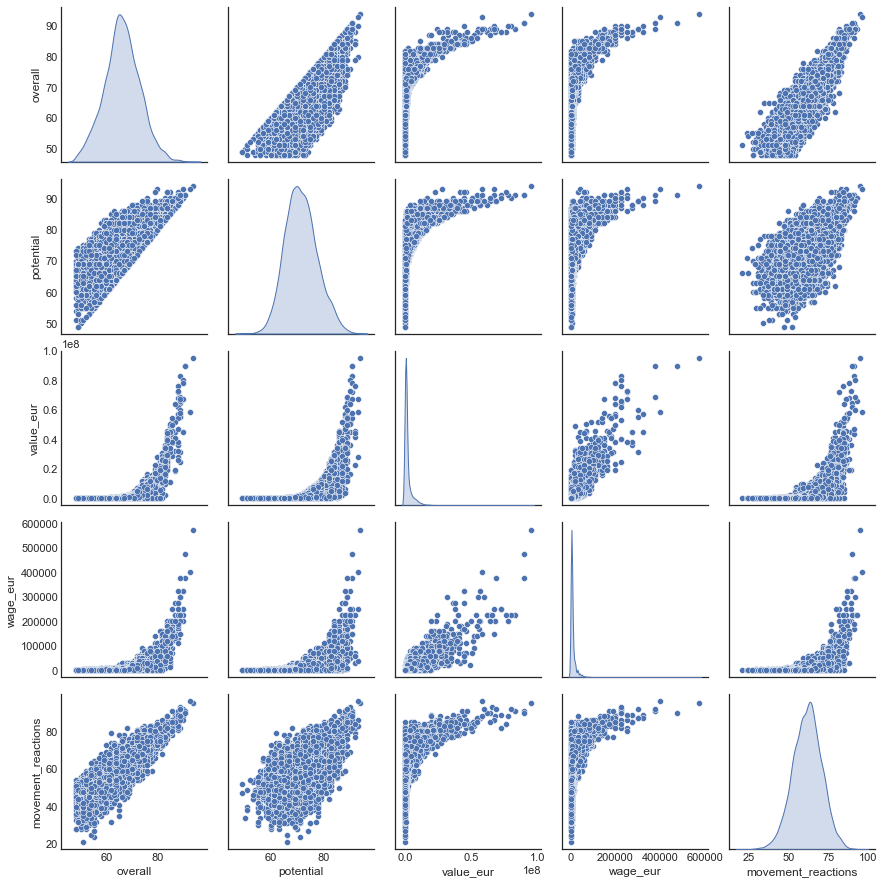

In [15]:
sns.pairplot(train_dataset[['overall', 'potential', 'value_eur', 'wage_eur', 'movement_reactions']], diag_kind='kde');

In [16]:
train_stats = train_dataset.describe()
train_stats.pop('value_eur')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
overall,14786.0,66.137833,6.934727,48.0,62.0,66.0,71.0,94.0
potential,14786.0,71.432098,6.101444,49.0,67.0,71.0,75.0,94.0
wage_eur,14786.0,9416.948465,20849.624268,0.0,2000.0,3000.0,8000.0,575000.0
movement_reactions,14786.0,61.645475,9.094750,21.0,56.0,62.0,68.0,96.0
rep_1,14786.0,0.920195,0.271001,0.0,1.0,1.0,1.0,1.0
rep_2,14786.0,0.062018,0.241197,0.0,0.0,0.0,0.0,1.0
rep_3,14786.0,0.014879,0.121072,0.0,0.0,0.0,0.0,1.0
rep_4,14786.0,0.002638,0.051292,0.0,0.0,0.0,0.0,1.0
rep_5,14786.0,0.000271,0.016446,0.0,0.0,0.0,0.0,1.0


In [17]:
train_labels = train_dataset.pop('value_eur')
test_labels = test_dataset.pop('value_eur')

In [18]:
def normalization(x):
    return(x- train_stats['mean']) / train_stats['std']

normed_train_data = normalization(train_dataset)
normed_test_data = normalization(test_dataset)

In [19]:
def build_model():
    input = Input(shape=(len(train_dataset.keys())), name='input')
    hidden1 = Dense(128, activation='relu', name='dense1')(input)
    hidden2 = Dense(128, activation='relu', name='dense2')(hidden1)
    output = Dense(1, name='output')(hidden2)
    
    model = Model(inputs=[input], outputs=output)
    
    model.compile(loss='mse', optimizer=RMSprop(0.001), metrics=['mae', 'mse'])

    return model

In [20]:
model = build_model()

model.summary()

plot_model(model)

sample_batch = normed_train_data[:10]
sample_result = model.predict(sample_batch)
sample_batch

epochs = 100

history = model.fit(normed_train_data, train_labels, epochs=epochs, validation_split=0.2)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 9)]               0         
_________________________________________________________________
dense1 (Dense)               (None, 128)               1280      
_________________________________________________________________
dense2 (Dense)               (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 1)                 129       
Total params: 17,921
Trainable params: 17,921
Non-trainable params: 0
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
Epoch 1/100
370/370 [==============================] - 2s 4ms/step - loss: 33666623340544.0000 - mae

370/370 [==============================] - 1s 4ms/step - loss: 6874031194112.0000 - mae: 1065888.7500 - mse: 6874031194112.0000 - val_loss: 8957397565440.0000 - val_mae: 1160581.2500 - val_mse: 8957397565440.0000
Epoch 33/100
370/370 [==============================] - 1s 4ms/step - loss: 6748446916608.0000 - mae: 1061302.6250 - mse: 6748446916608.0000 - val_loss: 8782386036736.0000 - val_mae: 1152820.3750 - val_mse: 8782386036736.0000
Epoch 34/100
370/370 [==============================] - 1s 4ms/step - loss: 6621178626048.0000 - mae: 1055716.5000 - mse: 6621178626048.0000 - val_loss: 8634682572800.0000 - val_mae: 1142474.3750 - val_mse: 8634682572800.0000
Epoch 35/100
370/370 [==============================] - 1s 4ms/step - loss: 6516364541952.0000 - mae: 1045604.8750 - mse: 6516364541952.0000 - val_loss: 8470991470592.0000 - val_mae: 1135060.8750 - val_mse: 8470991470592.0000
Epoch 36/100
370/370 [==============================] - 1s 4ms/step - loss: 6371891740672.0000 - mae: 1042269

370/370 [==============================] - 2s 5ms/step - loss: 4394289725440.0000 - mae: 938879.8125 - mse: 4394289725440.0000 - val_loss: 5313538293760.0000 - val_mae: 1004616.3750 - val_mse: 5313538293760.0000
Epoch 69/100
370/370 [==============================] - 2s 5ms/step - loss: 4372032651264.0000 - mae: 937095.3125 - mse: 4372032651264.0000 - val_loss: 5263821111296.0000 - val_mae: 1004655.8125 - val_mse: 5263821111296.0000
Epoch 70/100
370/370 [==============================] - 2s 4ms/step - loss: 4339617759232.0000 - mae: 937970.9375 - mse: 4339617759232.0000 - val_loss: 5220228661248.0000 - val_mae: 1003874.3125 - val_mse: 5220228661248.0000
Epoch 71/100
370/370 [==============================] - 1s 4ms/step - loss: 4300052889600.0000 - mae: 939744.0625 - mse: 4300052889600.0000 - val_loss: 5194617192448.0000 - val_mae: 1001821.1250 - val_mse: 5194617192448.0000
Epoch 72/100
370/370 [==============================] - 1s 4ms/step - loss: 4282633945088.0000 - mae: 937295.7500

In [21]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,3.366662e+13,2.380560e+06,3.366662e+13,4.068492e+13,2.557102e+06,4.068492e+13,0
1,3.362671e+13,2.378422e+06,3.362671e+13,4.060171e+13,2.552995e+06,4.060171e+13,1
2,3.349784e+13,2.371687e+06,3.349784e+13,4.039351e+13,2.542869e+06,4.039351e+13,2
3,3.323770e+13,2.357896e+06,3.323770e+13,4.000312e+13,2.524063e+06,4.000312e+13,3
4,3.278992e+13,2.334478e+06,3.278992e+13,3.936728e+13,2.493430e+06,3.936728e+13,4
5,3.210283e+13,2.298564e+06,3.210283e+13,3.845686e+13,2.449578e+06,3.845686e+13,5
6,3.114506e+13,2.248789e+06,3.114506e+13,3.721379e+13,2.389927e+06,3.721379e+13,6
7,2.988991e+13,2.182659e+06,2.988991e+13,3.565375e+13,2.314516e+06,3.565375e+13,7
8,2.836738e+13,2.100855e+06,2.836738e+13,3.381257e+13,2.224387e+06,3.381257e+13,8
9,2.651972e+13,2.001746e+06,2.651972e+13,3.157645e+13,2.113251e+06,3.157645e+13,9


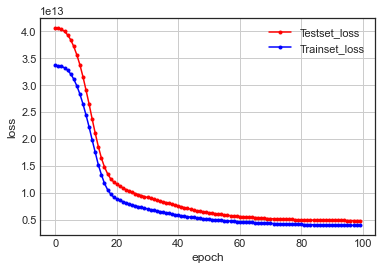

In [34]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 그래프 비교

### RMs 
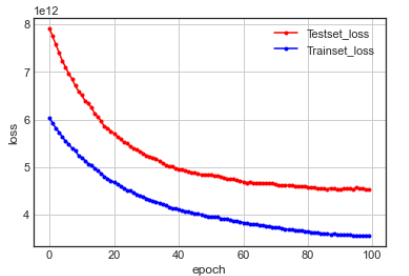 

### SGD
-Nan
### Adam
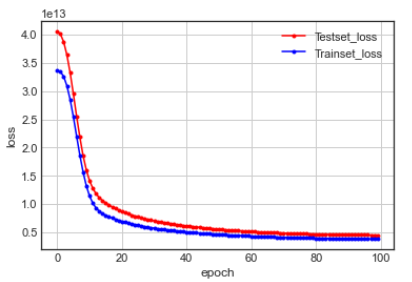

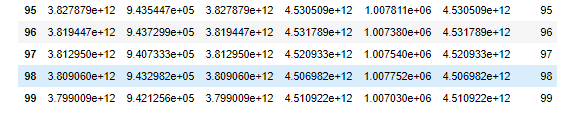

### NAdam
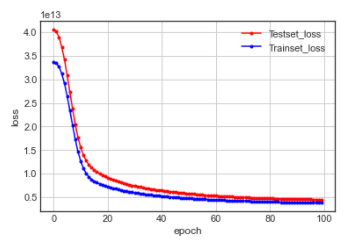

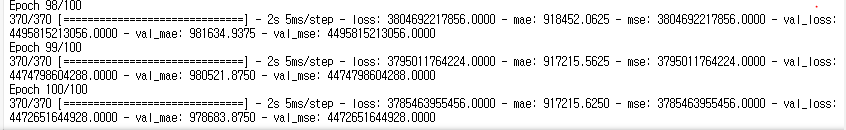

In [23]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print(mae)

116/116 - 0s - loss: 5879341514752.0000 - mae: 1014521.3125 - mse: 5879341514752.0000
1014521.3125


In [24]:
test_predictions = model.predict(normed_test_data)

In [25]:
test_predictions

array([[6.2384464e+07],
       [3.5038256e+07],
       [3.8646544e+07],
       ...,
       [5.5098560e+03],
       [5.5098560e+03],
       [5.5098560e+03]], dtype=float32)

In [26]:
A = pd.merge(test_dataset, dataset, left_index=True, right_index=True)
A

,overall_x,potential_x,wage_eur_x,movement_reactions_x,rep_1_x,rep_2_x,rep_3_x,rep_4_x,rep_5_x,overall_y,potential_y,value_eur,wage_eur_y,movement_reactions_y,rep_1_y,rep_2_y,rep_3_y,rep_4_y,rep_5_y
2,92,92,300000,92,0.0,0.0,0.0,0.0,1.0,92,92,105500000,300000,92,0.0,0.0,0.0,0.0,1.0
3,91,93,120000,88,0.0,0.0,1.0,0.0,0.0,91,93,77500000,120000,88,0.0,0.0,1.0,0.0,0.0
10,89,95,150000,89,0.0,0.0,1.0,0.0,0.0,89,95,93500000,150000,89,0.0,0.0,1.0,0.0,0.0
19,89,89,350000,92,0.0,0.0,0.0,0.0,1.0,89,89,53000000,350000,92,0.0,0.0,0.0,0.0,1.0
28,88,89,225000,83,0.0,0.0,0.0,1.0,0.0,88,89,48000000,225000,83,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18452,48,66,2000,45,1.0,0.0,0.0,0.0,0.0,48,66,60000,2000,45,1.0,0.0,0.0,0.0,0.0
18456,48,65,1000,47,1.0,0.0,0.0,0.0,0.0,48,65,50000,1000,47,1.0,0.0,0.0,0.0,0.0
18467,48,61,500,49,1.0,0.0,0.0,0.0,0.0,48,61,50000,500,49,1.0,0.0,0.0,0.0,0.0
18476,48,59,500,53,1.0,0.0,0.0,0.0,0.0,48,59,50000,500,53,1.0,0.0,0.0,0.0,0.0


In [27]:
b = A[['value_eur']]
b

,value_eur
2,105500000
3,77500000
10,93500000
19,53000000
28,48000000
...,...
18452,60000
18456,50000
18467,50000
18476,50000


In [28]:
b['Predict EUR'] = test_predictions

C:\Users\thcho\.conda\envs\dl_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
b

,value_eur,Predict EUR
2,105500000,6.238446e+07
3,77500000,3.503826e+07
10,93500000,3.864654e+07
19,53000000,6.546593e+07
28,48000000,4.406036e+07
...,...,...
18452,60000,5.509856e+03
18456,50000,5.509856e+03
18467,50000,5.509856e+03
18476,50000,5.509856e+03


In [30]:
b['dif'] = b['value']-b['Predict MPG']
b

KeyError: 'value'

In [ ]:
y_data = data['value'].values

In [ ]:
x_data = []
for i,rows in data.iterrows():
    x_data.append([ rows['stat_overall'], rows['stat_potential'] ])

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(np.array(x_data), np.array(y_data), epochs=1000)

In [ ]:
xy

In [ ]:
x_data = xy[:, 1:-1]
y_data = xy[:, [-1]]

In [ ]:
x_data

In [ ]:
y_data

In [ ]:
x_data.shape

In [ ]:
model=Sequential()
model.add(Dense(1, input_dim=5))
model.summary()
model.compile(loss='mse',optimizer='adam')

model.fit(x_data,y_data,epochs=2000,verbose=1)

P = model.predict(np.array([[31,5,94,94,4]]))
print(P)

In [ ]:
tf.compat.v1.disable_eager_execution()
X = tf.compat.v1.placeholder(tf.float32, shape=[None, 5])
Y = tf.compat.v1.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.compat.v1.random_normal([5, 1]), name="weight")
b = tf.Variable(tf.compat.v1.random_normal([1]), name='bias')

In [ ]:
X

In [ ]:
hypothesis = tf.matmul(X, W) + b

In [ ]:
hypothesis

In [ ]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [ ]:
cost

In [ ]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.000005)
train = optimizer.minimize(cost)

In [ ]:
sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

In [ ]:
for step in range(100001):
    cost_, hypo_, _ = sess.run([cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 500 == 0:
        print("#", step, " 손실 비용: ", cost_)
        print('- 선수 몸값: ', hypo_[0])

In [ ]:
saver = tf.compat.v1.train.Saver()
save_path = saver.save(sess, "../work/dacon/saved.cpkt")
print("Model Complete")